# Decision support system model

## Problem Statement
Predict potential clients who are most likely to open a bank account

## Data Description


The file has the below structure:
### insert structure


## EDA
The general steps we'll follow are:
- Import the required libraries for EDA
- Loading the data into the data frame
- Descriptive statistics
    - Checking the types of data
    - Get and understand some statistics from the dataset e.g. central tendancy, count, mean, standard deviation, minimum values, maximum values, quartiles and the median e.t.c
- Infrerential statitics
- Visualization
    - Plot different features against one another ()
    - Plot different features against their frequency ()
    - Plotting Heat-maps
- Hyposthes testing
    - Deriving Insights and Conclusions that would guide the approach you take for training our machine learning model
- Modelling

In [1]:
# !ls 
# !pip3 install --upgrade pathlib pandas_profiling

## Import the required libraries

In [2]:
import numpy as np
import pandas as pd


#Import PP
import pandas_profiling as pp
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import gridspec

## Load data

In [3]:
data_f = pd.read_csv('Train_v2.csv')
test_df = pd.read_csv('Test_v2.csv')
data_f.sample(10)

country  year       uniqueid bank_account location_type  \
1783      Kenya  2018  uniqueid_1784           No         Urban   
15455  Tanzania  2017   uniqueid_653           No         Urban   
21134  Tanzania  2017  uniqueid_6332           No         Urban   
16160  Tanzania  2017  uniqueid_1358           No         Rural   
10685    Rwanda  2016  uniqueid_4618           No         Rural   
19015  Tanzania  2017  uniqueid_4213           No         Urban   
16340  Tanzania  2017  uniqueid_1538           No         Rural   
9820     Rwanda  2016  uniqueid_3753           No         Rural   
22914    Uganda  2018  uniqueid_1492           No         Rural   
21731    Uganda  2018   uniqueid_309           No         Urban   

      cellphone_access  household_size  age_of_respondent  \
1783               Yes               5                 24   
15455              Yes               2                 40   
21134               No               1                 63   
16160              Yes               3                 80   
10685               No               4                 40   
19015              Yes               4                 26   
16340               No               3                 67   
9820               Yes               8                 42   
22914               No               3                 18   
21731              Yes               2                 21   

      gender_of_respondent relationship_with_head           marital_status  \
1783                  Male                  Child     Single/Never Married   
15455                 Male      Head of Household     Single/Never Married   
21134               Female      Head of Household     Single/Never Married   
16160                 Male      Head of Household     Single/Never Married   
10685               Female      Head of Household                  Widowed   
19015               Female                  Child  Married/Living together   
16340                 Male      Head of Household     Single/Never Married   
9820                Female                 Spouse  Married/Living together   
22914               Female                 Spouse  Married/Living together   
21731               Female      Head of Household  Married/Living together   

           education_level              job_type  
1783   Secondary education   Informally employed  
15455    Primary education         Self employed  
21134  No formal education         Self employed  
16160    Primary education  Remittance Dependent  
10685  No formal education   Informally employed  
19015    Primary education         Self employed  
16340  No formal education         Self employed  
9820     Primary education   Farming and Fishing  
22914    Primary education         Self employed  
21731  Secondary education          Other Income

## Statistics

In [4]:
### Check datatypes
data_f.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [5]:
pp.ProfileReport(data_f)

build report structure: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


### Seems we're in luck. Our data is very clean
### We have 2 numeric and 9 categorical variables(excluding bank_account). 
### Please have a look at the PP report above for more info

In [6]:
## For better anlysis, lets split our data into those with bank accounts and those without
yes_acc_df = data_f[data_f['bank_account'] == 'Yes']
no_acc_df = data_f[data_f['bank_account'] == 'No']

yes_acc_df.sample(10)

country  year       uniqueid bank_account location_type  \
4214      Kenya  2018  uniqueid_4215          Yes         Rural   
1071      Kenya  2018  uniqueid_1072          Yes         Urban   
1078      Kenya  2018  uniqueid_1079          Yes         Urban   
12496    Rwanda  2016  uniqueid_6429          Yes         Urban   
1570      Kenya  2018  uniqueid_1571          Yes         Urban   
10191    Rwanda  2016  uniqueid_4124          Yes         Rural   
6391     Rwanda  2016   uniqueid_324          Yes         Rural   
16546  Tanzania  2017  uniqueid_1744          Yes         Rural   
7680     Rwanda  2016  uniqueid_1613          Yes         Rural   
8025     Rwanda  2016  uniqueid_1958          Yes         Rural   

      cellphone_access  household_size  age_of_respondent  \
4214               Yes               6                 20   
1071               Yes               4                 35   
1078               Yes               4                 32   
12496              Yes               8                 37   
1570               Yes               3                 34   
10191              Yes               5                 33   
6391               Yes               5                 65   
16546              Yes               2                 36   
7680               Yes               3                 26   
8025                No               4                 31   

      gender_of_respondent relationship_with_head           marital_status  \
4214                Female                  Child     Single/Never Married   
1071                  Male      Head of Household  Married/Living together   
1078                Female                 Spouse  Married/Living together   
12496               Female                 Spouse  Married/Living together   
1570                  Male      Head of Household  Married/Living together   
10191                 Male      Head of Household  Married/Living together   
6391                  Male      Head of Household  Married/Living together   
16546               Female                 Spouse     Single/Never Married   
7680                  Male      Head of Household     Single/Never Married   
8025                  Male      Head of Household  Married/Living together   

                       education_level                    job_type  
4214               Secondary education        Remittance Dependent  
1071   Vocational/Specialised training   Formally employed Private  
1078               Secondary education               Self employed  
12496               Tertiary education   Formally employed Private  
1570   Vocational/Specialised training               Self employed  
10191                Primary education  Dont Know/Refuse to answer  
6391               No formal education         Farming and Fishing  
16546               Tertiary education               Self employed  
7680                 Primary education   Formally employed Private  
8025                 Primary education         Farming and Fishing

In [7]:
pp.ProfileReport(yes_acc_df)

build report structure: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


In [8]:
pp.ProfileReport(no_acc_df)

build report structure: 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]


In [9]:
data_f.describe()

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

## Visualizations

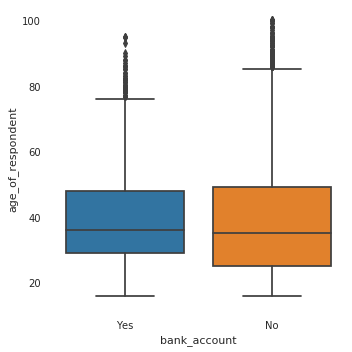

In [10]:
# Lets visualize
sns.catplot(data=data_f, y='age_of_respondent', x='bank_account', kind='box')

### Age had no effect on whether one opened a bank account or not
### The median age of those who opened an account and those who din't was 36 and 35 respectively
### There were a few ouliers on the higher side 

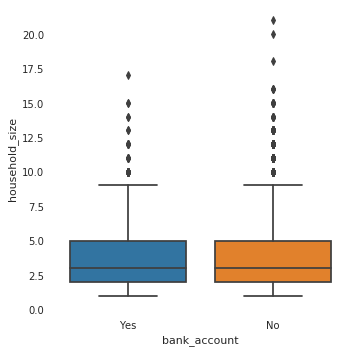

In [11]:
sns.catplot(data=data_f, y='household_size', x='bank_account', kind='box') 

### Again, Family had no effect on whether one opened a bank account or not
### The median family size of those who opened an account and those who din't was 3
### There were a few ouliers on the higher side. The largest family size was 21 members

In [12]:
# ke_acc_df = data_f[data_f['country'] == 'Kenya']
# ke_acc_df.sample(10)


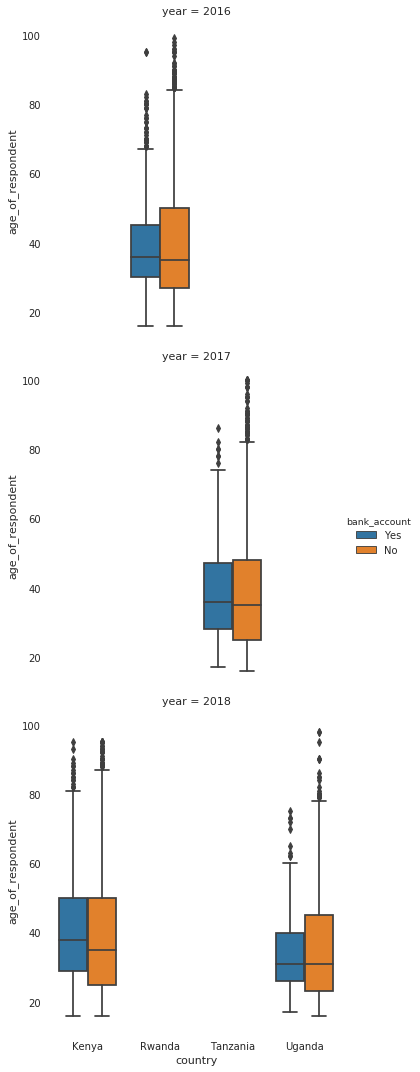

In [13]:
sns.catplot(data=data_f, y='age_of_respondent', x='country', row='year', hue="bank_account", kind='box') 


### The data for different countries are from different years too
### Kenya and Uganda had data for only 2018
### Tanzania's data was from 2017 and Rwanda's 2016

In [14]:
country_data = data_f.groupby(['country','year', 'bank_account',])['bank_account'].count()

In [15]:
country_data

country   year  bank_account
Kenya     2018  No              4547
                Yes             1521
Rwanda    2016  No              7732
                Yes             1003
Tanzania  2017  No              6013
                Yes              607
Uganda    2018  No              1920
                Yes              181
Name: bank_account, dtype: int64

In [16]:
def show_pie(data, title, options, pie_chart):
    wedges, texts, autotexts = pie_chart.pie(data, autopct= lambda val: f"{val:1.1f}%", labeldistance= None, rotatelabels=False, textprops=dict(color= 'w'))
    pie_chart.legend(wedges, options, title='Bank Account?', loc='upper right',bbox_to_anchor=(1,1,.3,0), fontsize=10)
    plt.setp(autotexts, size=10, weight='bold')
    pie_chart.set_title(title)
    return

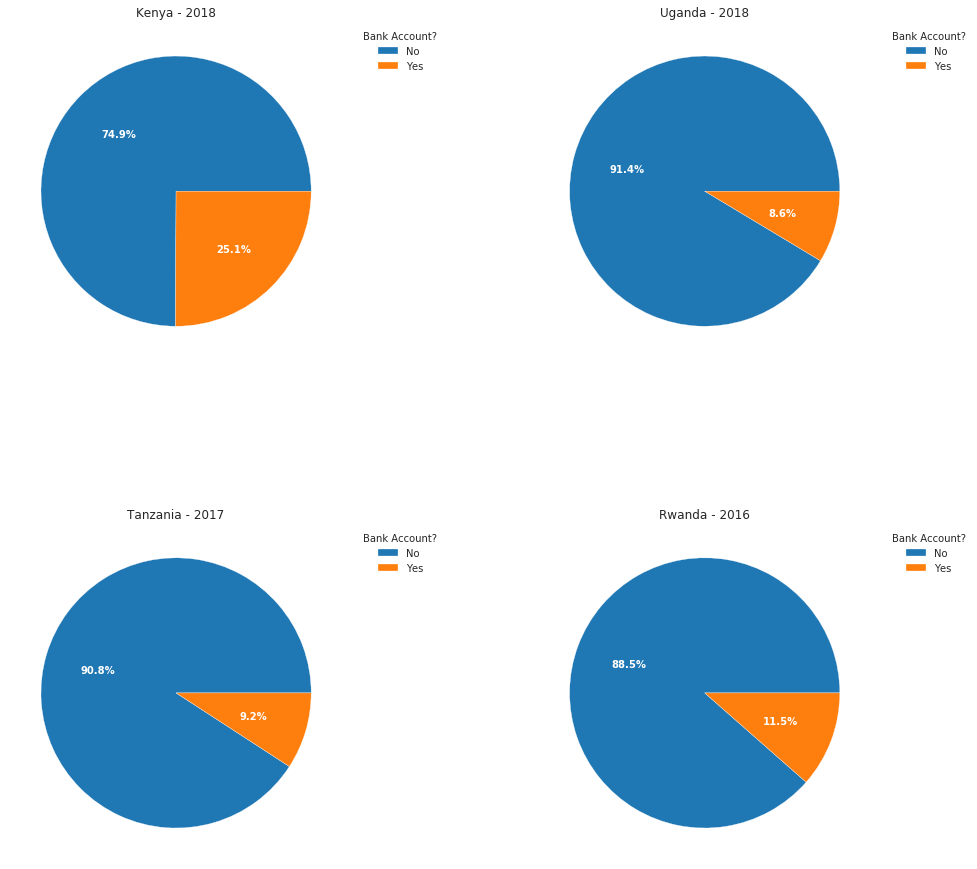

In [17]:

# #Create the pie chart

plt.figure(figsize=(25,25))
gs = gridspec.GridSpec(11,16)
#Create the pie charts
kenya_pie = plt.subplot(gs[0:3, 0:4])
uganda_pie = plt.subplot(gs[0:3, 6:10])
tanzania_pie = plt.subplot(gs[4:7, 0:4])
rwanda_pie = plt.subplot(gs[4:7, 6:10])

def show_country_pie(country, year, pie_chart):
    title = f"{country} - {year}"
    options = ['No', 'Yes']
    data = country_data[country][year]
    return show_pie(data=data, title=title, options=options, pie_chart = pie_chart)

show_country_pie(country='Kenya', year=2018, pie_chart=kenya_pie)
show_country_pie(country='Uganda', year=2018, pie_chart=uganda_pie)
show_country_pie(country='Tanzania', year=2017, pie_chart=tanzania_pie)
show_country_pie(country='Rwanda', year=2016, pie_chart=rwanda_pie)
plt.show()


### A vast majority of the respondents did not open a bank account
### In kenya, at least 25% agreed to open an account
### Rwanda, Tanzania and Uganda had lower percentages at 11.5, 9.2 and 8.6 respectively

In [18]:
location_grouping = data_f.groupby(['location_type', 'bank_account',])['bank_account'].count()
location_grouping


location_type  bank_account
Rural          No              12672
               Yes              1671
Urban          No               7540
               Yes              1641
Name: bank_account, dtype: int64

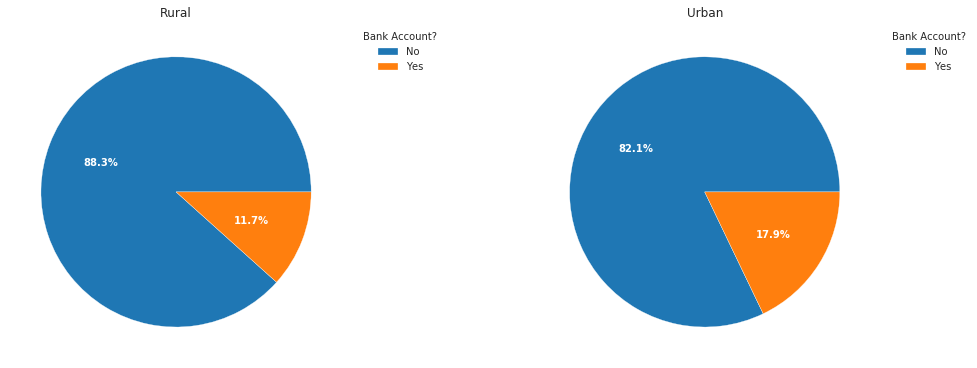

In [19]:
# #Create the pie chart

plt.figure(figsize=(25,25))
gs = gridspec.GridSpec(11,16)
#Create the pie charts
rural_pie = plt.subplot(gs[0:3, 0:4])
urban_pie = plt.subplot(gs[0:3, 6:10])

def show_loc_pie(location, pie_chart):
    title = f"{location}"
    options = ['No', 'Yes']
    data = location_grouping[location]
#     print(data['Yes']/(data['No'] + data['Yes']))
    return show_pie(data=data, title=title, options=options, pie_chart = pie_chart)

show_loc_pie(location='Rural', pie_chart=rural_pie)
show_loc_pie(location='Urban', pie_chart=urban_pie)
plt.show()


### About 17.9% of the respondents who live in urban areas opened an account
### Comparatively, only 11.7% of those from rural areas did

In [20]:

location_grouping = data_f.groupby(['gender_of_respondent', 'bank_account',])['bank_account'].count()
location_grouping


gender_of_respondent  bank_account
Female                No              12395
                      Yes              1482
Male                  No               7817
                      Yes              1830
Name: bank_account, dtype: int64

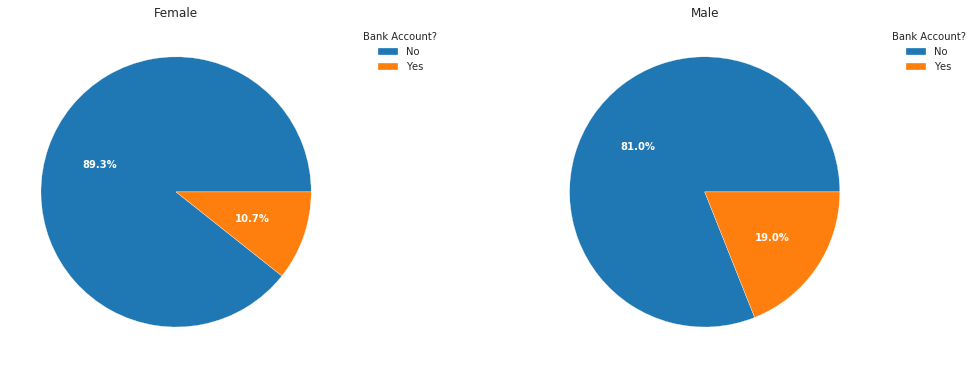

In [21]:
# #Create the pie chart

plt.figure(figsize=(25,25))
gs = gridspec.GridSpec(11,16)
#Create the pie charts
rural_pie = plt.subplot(gs[0:3, 0:4])
urban_pie = plt.subplot(gs[0:3, 6:10])

def show_loc_pie(location, pie_chart):
    title = f"{location}"
    options = ['No', 'Yes']
    data = location_grouping[location]
#     print(data['Yes']/(data['No'] + data['Yes']))
    return show_pie(data=data, title=title, options=options, pie_chart = pie_chart)

show_loc_pie(location='Female', pie_chart=rural_pie)
show_loc_pie(location='Male', pie_chart=urban_pie)
plt.show()

In [23]:
wn